### Imports

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
#import seaborn as sns

### Data structure

In [4]:
data = h5py.File('cutout_344137.hdf5','r')

In [5]:
#print(data.keys())

In [7]:
#for k in data["Header"].attrs:
#   print(k, data["Header"].attrs[k])

### Cosmological parameters

In [8]:
Omega_m, Omega_Lambda, Omega_b, H_0 = data["Header"].attrs['Omega0'], data["Header"].attrs['OmegaLambda'], data["Header"].attrs['OmegaBaryon'], data["Header"].attrs['HubbleParam']

In [9]:
N_dm_particles = data["Header"].attrs['NumPart_ThisFile'][1] #number of dark matter particles
mass_darkm = data["Header"].attrs['MassTable'][1] #mass of each dark matter particle in 1e10 solar masses/h
Box_size = data["Header"].attrs['BoxSize'] #cubic box size
z = data["Header"].attrs['Redshift'] #redshift
a = data["Header"].attrs['Time'] #scale factor

In [10]:
#N_dm_particles, mass_dm

In [11]:
#data['PartType1'].keys()

### Units

In [14]:
from astropy import units as u
from astropy.units import km, au, pc, kpc, s, yr, Myr, Gyr, Msun, rad, kg, J, m

In [16]:
G = 6.6743e-11 * m**3 / kg / s**2
G = G.to('kpc3/(Msun*Gyr2)')
G

<Quantity 4.49850215e-06 kpc3 / (solMass Gyr2)>

Predefined the characteristic unit scales according to the dataset according to [TNG unit system](https://www.tng-project.org/data/docs/specifications/#parttype1).


In [17]:
L_u = kpc/H_0 #length unit
V_u = (km/s)*np.sqrt(a) #spatial velocity unit
Phi_u = V_u**2 #potential unit
M_u = 10e10*Msun/H_0 #dark mass unit

In [18]:
xyz = np.array(data['PartType1']['Coordinates'][:])*L_u #coordinate in co-moving distance
phi = np.array(data['PartType1']['Potential'][:])*Phi_u
vxyz = np.array(data['PartType1']['Velocities'][:])*V_u
mass_dm = mass_darkm*M_u
M = N_dm_particles*mass_dm
#print(XYZ.shape), print(PHI.shape), print(VXYZ.shape)

In [19]:
# Mean of the velocites and positions coordinates
vxyz_mean = np.mean(vxyz, axis=0)
xyz_mean = np.mean(xyz, axis=0)
#print(vxyz_mean), print(xyz_mean)

Data standardization: here all velocities and positions coordinates are centered around theire mean value.

In [20]:
xyz -= xyz_mean
#vxyz -= vxyz_mean

The potential $\phi$ is the potential at each particle coordinate due to all other particles in the simulation box, i.e, $
\Phi(\mathbf{x}) = -G \sum_{i \neq j} \frac{m_j}{|\mathbf{x} - \mathbf{x}_j|}$.

In [21]:
#distances
r = np.linalg.norm(xyz, axis=1)
x, y, z = xyz[:,0], xyz[:,1], xyz[:,2]
R = np.sqrt(x**2 + y**2)

#velocities
vx, vy, vz = vxyz[:,0], vxyz[:,1], vxyz[:,2]
v = np.linalg.norm(vxyz, axis=1)

In [151]:
from mpl_toolkits.mplot3d import Axes3D

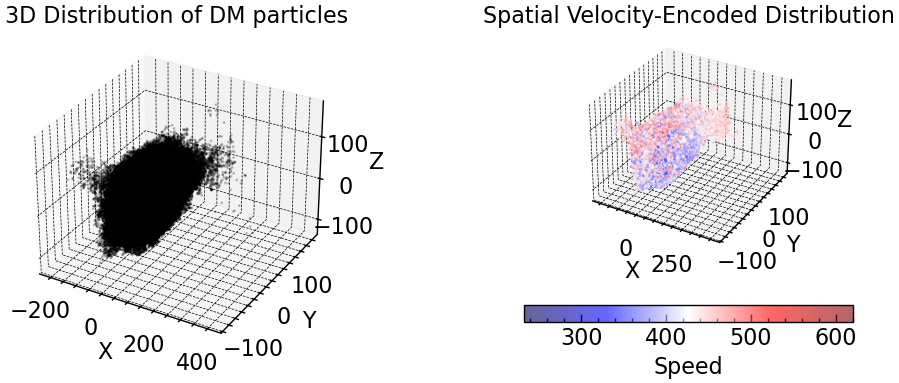

In [152]:
fig = plt.figure(figsize=(12, 4))
ax= fig.add_subplot(1,2,1, projection='3d')
ax.scatter(x, y, z, s=1, c='k', alpha=0.2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Distribution of DM particles')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc = ax2.scatter(x, y, z, s=1, c=v, cmap='seismic', alpha=0.6)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Spatial Velocity-Encoded Distribution')

fig.colorbar(sc, ax=ax2, label='Speed', orientation='horizontal', shrink=0.5)
plt.tight_layout()
plt.show()


Planar distributions of the dark matter particles in the simulation box.

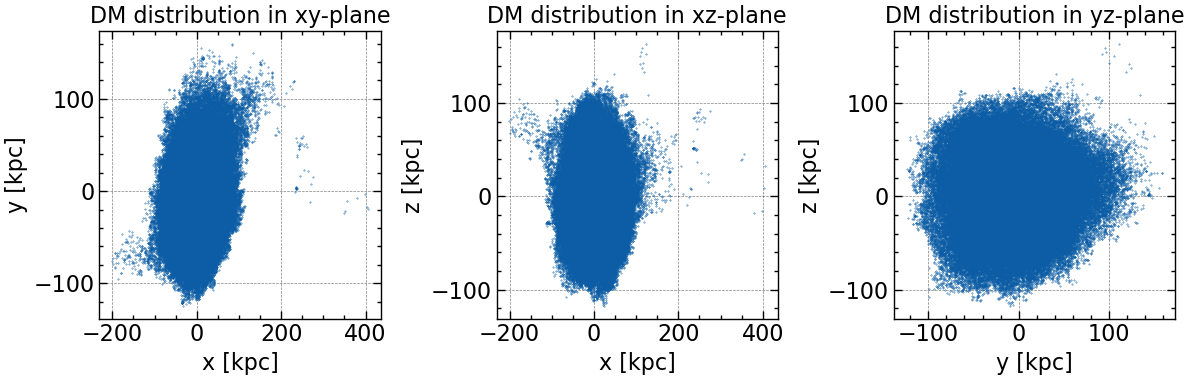

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(x, y, s=0.1)
axes[0].set_xlabel("x [kpc]")
axes[0].set_ylabel("y [kpc]")
axes[0].set_title("DM distribution in xy-plane")

axes[1].scatter(x, z, s=0.1)
axes[1].set_xlabel("x [kpc]")
axes[1].set_ylabel("z [kpc]")
axes[1].set_title("DM distribution in xz-plane")
axes[2].scatter(y, z, s=0.1)
axes[2].set_xlabel("y [kpc]")
axes[2].set_ylabel("z [kpc]")
axes[2].set_title("DM distribution in yz-plane")
plt.tight_layout()
plt.show()

C:\Users\chris\AppData\Local\Temp\ipykernel_26260\2996067522.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


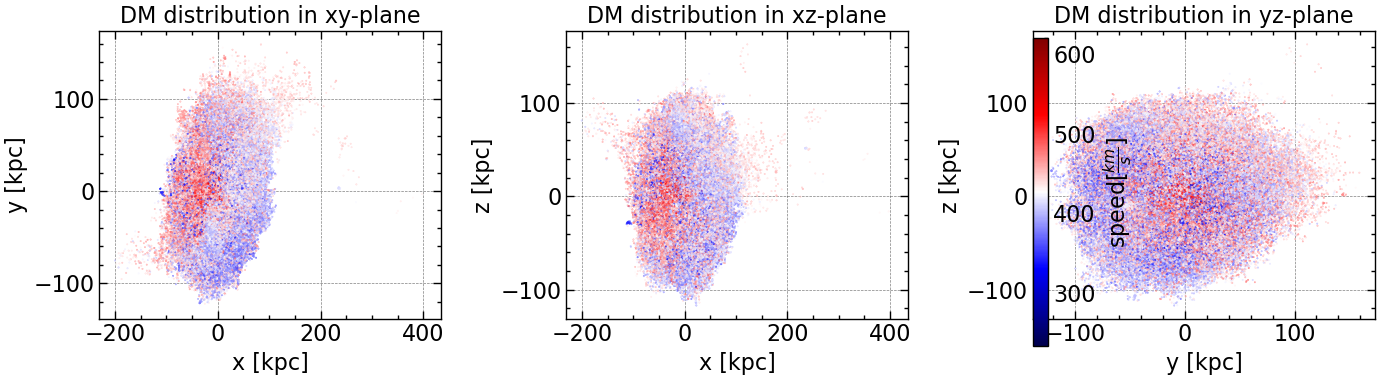

In [ ]:
plt.close('all')
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].scatter(x, y, s=0.1, c=v.value, cmap='seismic')
axes[0].set_xlabel("x [kpc]")
axes[0].set_ylabel("y [kpc]")
axes[0].set_title("DM distribution in xy-plane")

axes[1].scatter(x, z, s=0.1, c=v.value, cmap='seismic')
axes[1].set_xlabel("x [kpc]")
axes[1].set_ylabel("z [kpc]")
axes[1].set_title("DM distribution in xz-plane")

ax2 = axes[2].scatter(y, z, s=0.1, c=v.value, cmap='seismic')
axes[2].set_xlabel("y [kpc]")
axes[2].set_ylabel("z [kpc]")
axes[2].set_title("DM distribution in yz-plane")

cbar = fig.colorbar(ax2, ax=axes, orientation='vertical', fraction=0.2, pad=0.04)
cbar.set_label(r'$\text{speed} \,[\frac{km}{s}]$')
plt.tight_layout()
plt.show()

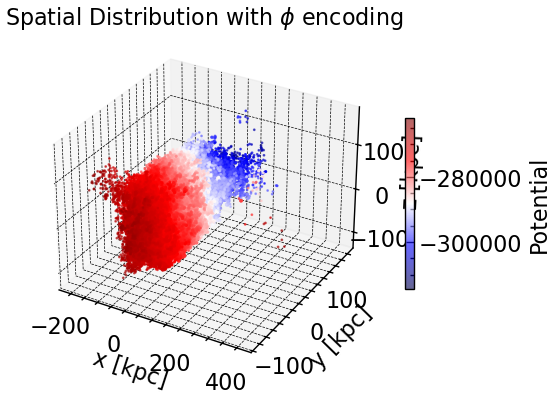

In [154]:
#potential of the system
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
sc = ax.scatter(x, y, z, s=1, c=phi, cmap='seismic', alpha=0.6)
ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')
ax.set_zlabel('z [kpc]')
ax.set_title(r'Spatial Distribution with $\phi$ encoding')
plt.tight_layout()
fig.colorbar(sc, ax=ax, label='Potential', orientation='vertical', shrink=0.5)
plt.show()

### Task 1 : density

\begin{equation}
\rho(\mathbf{x}) = \frac{\Delta M}{\Delta V}
\end{equation}

Compute a histogram for diffrent radii

In [22]:
r_max, r_min = np.max(r), np.min(r)
r_max, r_min

(<Quantity 407.04098257 kpc>, <Quantity 0.13104862 kpc>)

In [25]:
r_bin = np.linspace(r_min, r_max, 300)
counts, bin_edges = np.histogram(r, bins=r_bin)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

vol = (4/3)*np.pi*(bin_edges[1:]**3 - bin_edges[:-1]**3)
rho = counts*mass_dm/vol  # density

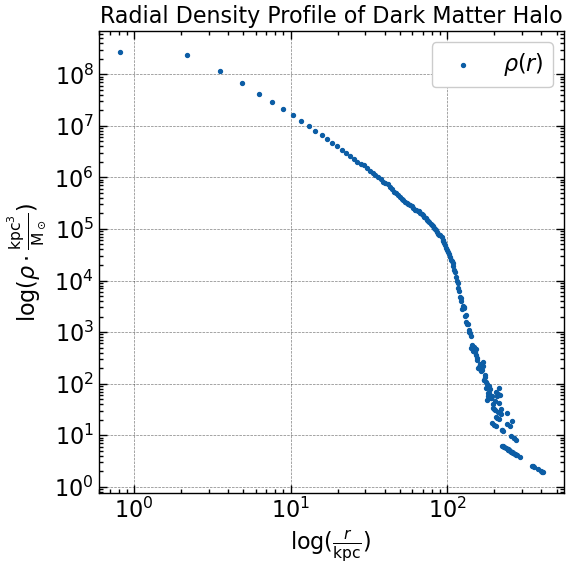

In [26]:
plt.close('all')
plt.figure(figsize=(6,6))
plt.scatter(bin_centers, rho, s=8, label=r'$\rho(r)$')
#plt.plot(bin_centers, rho, '-', color='red', alpha=0.4)
plt.xlabel(r'$\log(\frac{r}{\text{kpc}})$')
plt.ylabel(r'$\log(\rho\cdot \frac{\text{kpc}^3}{\text{M}_\odot})$')
plt.title('Radial Density Profile of Dark Matter Halo')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()